In [5]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier

In [6]:
# Load data from csv into numpy array
def load_data(filename, skiprows = 1):
    return np.loadtxt(filename, skiprows=skiprows, delimiter=',')

In [7]:
train_data = load_data("train_2008.csv")
test_data = load_data("test_2008.csv")

In [9]:
# divide the training data
X = train_data[:, 3:382]
Y = train_data[:, 382] 
test = test_data[:, 3:382]

In [ ]:
model = XGBClassifier()
model.fit(X, Y)
feature_importance_array = model.feature_importances_
X_mod = []

for i in range(0, len(feature_importance_array)-3): 
    if feature_importance_array[i] != 0: 
        X_temp = X[:, i]
        X_mod.append(X_temp)
        
X_modified = list(map(list, zip(*X_mod)))
X = np.asarray(X_modified)

In [10]:
# Normalize both the training and testing distribution according to the training data distribution
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
test = scaler.transform(test)

In [ ]:
model = XGBClassifier()
model.fit(X, Y)
# feature importance

In [ ]:
print(model.feature_importances_)

In [ ]:
feature_importance_array = model.feature_importances_
X_mod = []
Y_mod = []

for i in range(0, len(feature_importance_array)-3): 
    if feature_importance_array[i] != 0: 
        X_temp = X[:, i]
        X_mod.append(X_temp)

In [ ]:
len(feature_importance_array)

In [ ]:
X_modified = list(map(list, zip(*X_mod)))

In [ ]:
X = np.asarray(X_modified)


Estimators: 35
.....
Estimators: 36
.....
Estimators: 37
.....
Estimators: 38
.....
Estimators: 39
.....
Estimators: 40
.....
Estimators: 41
.....
Estimators: 42
.....
Estimators: 43
.....
Estimators: 44
.....
Estimators: 45
.....
Estimators: 46
.....
Estimators: 47
.....
Estimators: 48
.....
Estimators: 49
.....
Estimators: 50
.....
Estimators: 51
.....
Estimators: 52
.....
Estimators: 53
.....
Estimators: 54
.....
Estimators: 55
.....

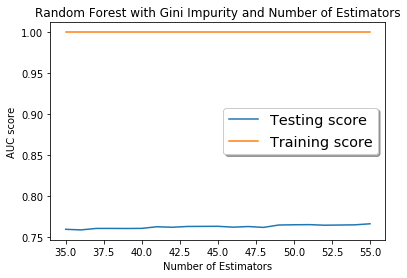

Test score maximized at estimator number = 55


In [6]:
# Parameter tuning: number of estimators
estimators = np.arange(35, 56)

# Number of folds to perform cross validation over
fold = 5
# N_jobs = -1 to speed up computation, doesn't limit number of processors on CPU
clf = RandomForestClassifier(criterion = 'gini', n_jobs = -1)

test_score = []
train_score = []
for n in estimators:
    # Useful output (also assures you that the program is actually running)
    print("\nEstimators: " + repr(n))
    # For taking the average later
    tot_train = 0
    tot_test = 0
    # Set our parameter
    clf.set_params(n_estimators=n)
    
    kf = KFold(n_splits=fold)
    for train_index, test_index in kf.split(X):
        # Useful output (also assures you that the program is actually running)
        print(".", end="")
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        clf.fit(X_train, Y_train)
        
        # Use our model to make predictions
        train_prob = clf.predict_proba(X_train)
        test_prob = clf.predict_proba(X_test)
        # The second column is the probabilities of class 1
        # We calculate the AUC score (higher is better)
        tot_train += roc_auc_score(Y_train, train_prob[:, 1])
        tot_test += roc_auc_score(Y_test, test_prob[:, 1])
    # Store the average AUC across k folds for each parameter    
    train_score.append(tot_train / fold)
    test_score.append(tot_test / fold)

plt.figure()
plt.plot(estimators, test_score, label='Testing score')
plt.plot(estimators, train_score, label='Training score')
plt.xlabel('Number of Estimators')
plt.ylabel('AUC score')
plt.title('Random Forest with Gini Impurity and Number of Estimators')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

# Find the parameter that causes the maximum AUC score
print('Test score maximized at estimator number = %i' % estimators[np.argmax(test_score)])


leaf number: 20
.....
leaf number: 21
.....
leaf number: 22
.....
leaf number: 23
.....
leaf number: 24
.....
leaf number: 25
.....
leaf number: 26
.....
leaf number: 27
.....
leaf number: 28
.....
leaf number: 29
.....
leaf number: 30
.....
leaf number: 31
.....
leaf number: 32
.....
leaf number: 33
.....
leaf number: 34
.....
leaf number: 35
.....
leaf number: 36
.....
leaf number: 37
.....
leaf number: 38
.....
leaf number: 39
.....
leaf number: 40
.....
leaf number: 41
.....
leaf number: 42
.....
leaf number: 43
.....
leaf number: 44
.....
leaf number: 45
.....
leaf number: 46
.....
leaf number: 47
.....
leaf number: 48
.....
leaf number: 49
.....

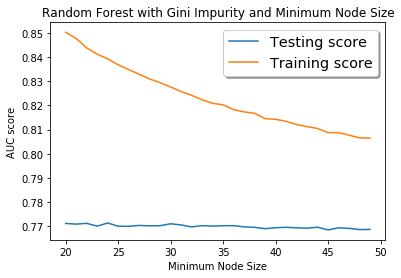

Test score maximized at min_samples_leaf = 24


In [7]:
# Parameter tuning: minimum leaf node
min_samples_leaf = np.arange(20, 50)

# Number of folds to perform cross validation over
fold = 5
# N_jobs = -1 to speed up computation, doesn't limit number of processors on CPU
clf = RandomForestClassifier(n_estimators = 35, criterion = 'gini', n_jobs = -1)

test_score = []
train_score = []
for leaf in min_samples_leaf:
    # Useful output (also assures you that the program is actually running)
    print("\nleaf number: " + repr(leaf))
    # For taking the average later
    tot_train = 0
    tot_test = 0
    # Set our parameter
    clf.set_params(min_samples_leaf=leaf)
    
    kf = KFold(n_splits=fold)
    for train_index, test_index in kf.split(X):
        # Useful output (also assures you that the program is actually running)
        print(".", end="")
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        clf.fit(X_train, Y_train)
        
        # Use our model to make predictions 
        train_prob = clf.predict_proba(X_train)
        test_prob = clf.predict_proba(X_test)
        # The second column is the probabilities of class 1
        # We calculate the AUC score (higher is better)
        tot_train += roc_auc_score(Y_train, train_prob[:, 1])
        tot_test += roc_auc_score(Y_test, test_prob[:, 1])
    # Store the average AUC across k folds for each parameter     
    train_score.append(tot_train / fold)
    test_score.append(tot_test / fold)
    
plt.figure()
plt.plot(min_samples_leaf, test_score, label='Testing score')
plt.plot(min_samples_leaf, train_score, label='Training score')
plt.xlabel('Minimum Node Size')
plt.ylabel('AUC score')
plt.title('Random Forest with Gini Impurity and Minimum Node Size')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

# Find the parameter that causes the maximum AUC score
print('Test score maximized at min_samples_leaf = %i' % min_samples_leaf[np.argmax(test_score)])


depth number: 2
.....
depth number: 3
.....
depth number: 4
.....
depth number: 5
.....
depth number: 6
.....
depth number: 7
.....
depth number: 8
.....
depth number: 9
.....
depth number: 10
.....
depth number: 11
.....
depth number: 12
.....
depth number: 13
.....
depth number: 14
.....
depth number: 15
.....
depth number: 16
.....
depth number: 17
.....
depth number: 18
.....
depth number: 19
.....
depth number: 20
.....

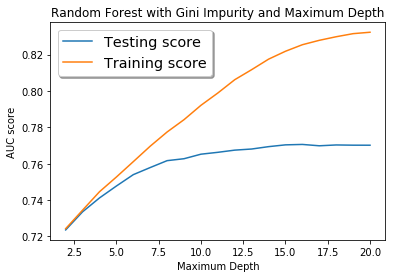

Test error maximized at max_depth = 16


In [8]:
# Parameter tuning: maximum depth
max_depth = np.arange(2, 21)

# Number to perform cross validation over
fold = 5
clf = RandomForestClassifier(n_estimators = 35, min_samples_leaf = 26, criterion = 'gini', n_jobs = -1)

test_score = []
train_score = []
for depth in max_depth:
    print("\ndepth number: " + repr(depth))

    tot_train = 0
    tot_test = 0
    index = 0
    clf.set_params(max_depth=depth)
    kf = KFold(n_splits=fold)
    for train_index, test_index in kf.split(X):
        print(".", end="")
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        clf.fit(X_train, Y_train)
        
        # the second column is for the probability for positive 
        train_prob = clf.predict_proba(X_train)
        test_prob = clf.predict_proba(X_test)
        tot_train += roc_auc_score(Y_train, train_prob[:, 1])
        tot_test += roc_auc_score(Y_test, test_prob[:, 1])
        index += 1
    train_score.append(tot_train / fold)
    test_score.append(tot_test / fold)
    
plt.figure()
plt.plot(max_depth, test_score, label='Testing score')
plt.plot(max_depth, train_score, label='Training score')
plt.xlabel('Maximum Depth')
plt.ylabel('AUC score')
plt.title('Random Forest with Gini Impurity and Maximum Depth')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

print('Test error maximized at max_depth = %i' % max_depth[np.argmax(test_score)])

In [9]:
# For tinkering in general with the model parameters
# K fold validation to provide a test score
fold = 5
estimators = 58
leaf = 26
depth = 17

tot_train = 0
tot_test = 0

clf = RandomForestClassifier(n_estimators = estimators, min_samples_leaf = leaf, \
                                 max_depth = depth, criterion = 'gini', n_jobs = -1)
kf = KFold(n_splits=fold)
for train_index, test_index in kf.split(X):
    print(".", end="")
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    clf.fit(X_train, Y_train)
    
    train_prob = clf.predict_proba(X_train)
    test_prob = clf.predict_proba(X_test)
    tot_train += roc_auc_score(Y_train, train_prob[:, 1])
    tot_test += roc_auc_score(Y_test, test_prob[:, 1])

print("\nTraining auc: " + repr(tot_train / fold))
print("Testing auc: " + repr(tot_test / fold))

.....
Training auc: 0.8293700665644446
Testing auc: 0.7710785928695637


In [10]:
# Running final tuned model
estimators = 58
leaf = 26
depth = 17

# Define our model
clf = RandomForestClassifier(n_estimators = estimators, min_samples_leaf = leaf, \
                                 max_depth = depth, criterion = 'gini', n_jobs = -1)
# Fit model on training data 
clf.fit(X, Y)

# Predictions for training
# the second column is the probabilities of class 1
train_prob = clf.predict_proba(X)
print("Training auc: " + repr(roc_auc_score(Y, train_prob[:, 1])))

Training auc: 0.8279260379773266


In [11]:
test_prob = clf.predict_proba(test)
# Get column for the predictions of probabilities of being 1
prob_ones = test_prob[:, 1]
# Add first column of id that correspond with the predictions
prob_ones = np.transpose(np.vstack((test_data[:, 0].astype(np.int32), prob_ones)))

In [12]:
# Saving the test_prob as a csv file in the proper format
np.savetxt("predictions2.csv", prob_ones, fmt = '%d,%21.20f', delimiter=',', header = 'id,target', comments='')